### 비지도 학습 예제 3

#### 신용카드 부정 거래 탐지 시스템 개발

문제

신용카드 부정 거래를 탐지하는 모델 훈련

- 데이터는 Kaggle에서 제공하는 **Credit Card Fraud Detection** 데이터셋을 사용
- 주어진 신용카드 거래 데이터를 기반으로 부정 거래를 식별하는 모델을 학습시키고, 이 모델을 통해 이상치(부정 거래)를 탐지
- 이 데이터는 각 거래의 다양한 특성과 `Class`라는 열로 부정 거래 여부를 표시
- `Class` 값이 **1**이면 부정 거래, **0**이면 정상 거래를 의미
- 이 문제의 목표는 주어진 데이터를 기반으로 부정 거래를 탐지하는 **Isolation Forest** 모델을 활용하여
- 이상치(부정 거래)를 정확하게 탐지하는 것

In [61]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # 평가 지표

In [62]:
# 데이터 불러오기
data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [63]:
print(data.shape)

(284807, 31)


In [64]:
# 기존 데이터 분리
x_data = data.drop('Class', axis=1)
y_data = data['Class']

In [65]:
# 데이터 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

In [66]:
print(x_scaled)

[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


In [67]:
# PCA로 차원 축소
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [68]:
print(x_pca)

[[ 0.41663045 -2.53266428]
 [-0.39345348 -2.0773255 ]
 [ 1.86852545 -2.53349699]
 ...
 [-0.19406338  2.07078798]
 [-0.46608925  1.22539363]
 [ 0.76759651  1.90590292]]


In [69]:
# 스케일링 된 x데이터프레임으로 변형
ori_df = pd.DataFrame(x_pca, columns=['F1', 'F2'])

In [70]:
# y를 합치기
df = pd.concat([ori_df, y_data], axis=1)
print(df.head())

         F1        F2  Class
0  0.416630 -2.532664      0
1 -0.393453 -2.077326      0
2  1.868525 -2.533497      0
3  0.315744 -1.783506      0
4 -0.004379 -1.488415      0


In [77]:
print(df['F1'].max())

132.4681132069886


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


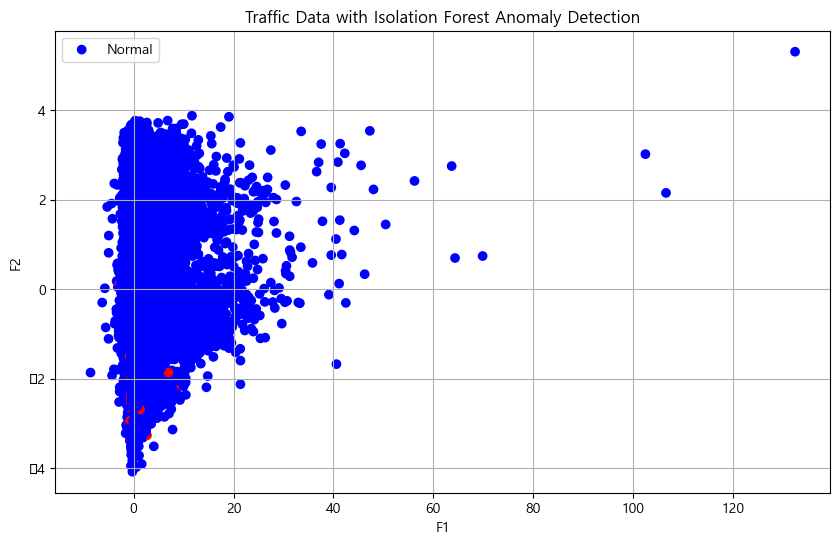

In [71]:
# 기존 데이터 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
plt.scatter(
df["F1"], df["F2"],
c=df['Class'].map({0: "blue", 1: "red"}), # 색상 매핑
label='Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend(['Normal', 'Anormal'])
plt.grid()
plt.show()

In [72]:
#Isolated Forest 모델 학습
model = IsolationForest(n_estimators=100, contamination=0.017, random_state=42)

ori_df['Anomaly Score'] = model.fit_predict(ori_df)
ori_df['Anomaly'] = ori_df['Anomaly Score'].apply(lambda x: 0 if x == 1 else 1)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


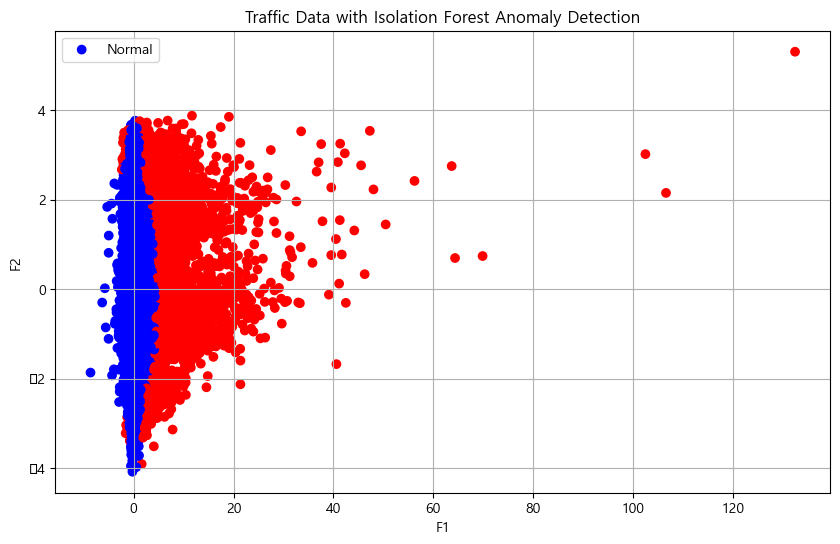

In [73]:
# 학습된 이상치 데이터 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
plt.scatter(
ori_df["F1"], ori_df["F2"],
c=ori_df['Anomaly'].map({0: "blue", 1: "red"}), # 색상 매핑
label='Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend(['Normal', 'Anomaly'])
plt.grid()
plt.show()

In [74]:
data['Class'].value_counts(0)

Class
0    284315
1       492
Name: count, dtype: int64

In [75]:
ori_df['Anomaly'].value_counts(0)

Anomaly
0    279967
1      4840
Name: count, dtype: int64

In [76]:
print(classification_report(y_data, ori_df['Anomaly']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.00      0.04      0.01       492

    accuracy                           0.98    284807
   macro avg       0.50      0.51      0.50    284807
weighted avg       1.00      0.98      0.99    284807

